In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPool2D, Dropout, BatchNormalization, Flatten, Activation
from tensorflow.keras.regularizers import L2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [3]:
train = "asl_alphabet_train/asl_alphabet_train"

In [4]:
os.listdir(train)

['P',
 'H',
 'X',
 'D',
 'T',
 'L',
 'space',
 'B',
 'R',
 'J',
 'Z',
 'F',
 'V',
 'N',
 'A',
 'Q',
 'I',
 'Y',
 'del',
 'E',
 'U',
 'M',
 'C',
 'S',
 'K',
 'G',
 'nothing',
 'W',
 'O']

In [5]:
classes = os.listdir(train)

In [6]:
len(classes)

29

In [7]:
train_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
                               rescale = 1./255.,
                               # rotation_range = 30, zoom_range = 0.2, shear_range = 0.2, 
                               validation_split = 0.1)

train_batches = train_gen.flow_from_directory(train, target_size = (224, 224), batch_size = 16, subset = 'training', classes = classes, shuffle = False)
val_batches = train_gen.flow_from_directory(train, target_size = (224, 224), batch_size = 1, subset = 'validation', classes = classes, shuffle = False)

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


### Model

In [14]:
vgg = tf.keras.applications.vgg16.VGG16(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))

In [15]:
vgg.trainable = False

In [16]:
x = Flatten()(vgg.output)

x = Dropout(0.5)(x)

out = Dense(29, activation = 'softmax')(x)

model1 = Model(inputs = vgg.input, outputs = out)

In [17]:
model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [13]:
cb = tf.keras.callbacks.ModelCheckpoint('vgg16_2.ckpt', save_weights_only = True, verbose = 1)

In [18]:
model1.load_weights('vgg16_2.ckpt')

In [ ]:
model.fit(train_batches, epochs = 15, callbacks = [cb], validation_data = val_batches)

Epoch 1/15
Extension horovod.torch has not been built: /usr/local/lib/python3.8/site-packages/horovod/torch/mpi_lib/_mpi_lib.cpython-38-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still avaiable.
[2023-03-09 18:57:35.426 tensorflow-2-6-gpu--ml-g4dn-xlarge-16c714feadc316564cf772a5f8d2:2342 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-03-09 18:57:35.450 tensorflow-2-6-gpu--ml-g4dn-xlarge-16c714feadc316564cf772a5f8d2:2342 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
4894/4894 [==============================] - 938s 190ms/step - loss: 5.0342 - accuracy: 0.7677 - val_loss: 3.5311 - val_accuracy: 0.8391

Epoch 00001: saving model to vgg16_2.ckpt
Epoch 2/15
4894/4894 [==============================] - 943s 193ms/step - loss: 2.7853 - accuracy: 0.8339 - val_los

KeyboardInterrupt: 

In [ ]:
model.save('vgg16.h5')

In [11]:
model = tf.keras.models.load_model('vgg16.h5')

In [13]:
model.evaluate(val_batches)

8700/8700 [==============================] - 72s 8ms/step - loss: 2.4347 - accuracy: 0.8731


[2.434704542160034, 0.8731034398078918]

In [85]:
from sklearn.metrics import classification_report

In [81]:
pred = model.predict(val_batches)

In [84]:
pred = np.argmax(pred, axis = 1)

In [86]:
cr = classification_report(val_batches.labels, pred)

In [87]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       300
           1       0.97      0.91      0.94       300
           2       0.89      0.47      0.61       300
           3       0.99      0.96      0.97       300
           4       0.79      0.28      0.42       300
           5       1.00      1.00      1.00       300
           6       0.99      0.99      0.99       300
           7       0.97      0.93      0.95       300
           8       0.78      0.96      0.86       300
           9       0.99      1.00      1.00       300
          10       0.89      0.87      0.88       300
          11       1.00      0.99      0.99       300
          12       0.91      0.51      0.66       300
          13       0.92      0.97      0.94       300
          14       0.81      0.86      0.83       300
          15       0.95      1.00      0.97       300
          16       1.00      0.74      0.85       300
          17       0.65    

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [89]:
cm = confusion_matrix(val_batches.labels, pred)

In [90]:
cm_dis = ConfusionMatrixDisplay(cm)

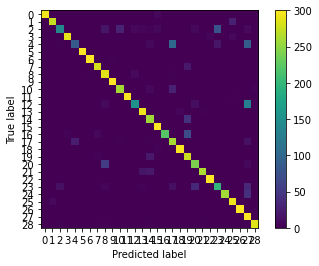

In [93]:
cm_dis.plot(include_values = False)